In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:

M = 1.0
s = 1.0
N = 1000


numbers = pd.Series(np.random.normal(loc=M, scale=s, size=N))
print("Первые 5 сгенерированных значений:")
print(numbers.head())

Первые 5 сгенерированных значений:
0    0.657711
1    0.039515
2    0.610288
3    0.989337
4    1.459575
dtype: float64


In [ ]:

share_in_1s = numbers[(numbers > M - s) & (numbers < M + s)].count() / N
print(f"Доля значений в диапазоне (M-s, M+s): {share_in_1s:.4f} или {share_in_1s:.2%}")

Доля значений в диапазоне (M-s, M+s): 0.6970 или 69.70%


In [ ]:

share_in_3s = numbers[(numbers > M - 3*s) & (numbers < M + 3*s)].count() / N
print(f"Доля значений в диапазоне (M-3s, M+3s): {share_in_3s:.4f} или {share_in_3s:.2%}")

Доля значений в диапазоне (M-3s, M+3s): 0.9990 или 99.90%


In [ ]:

roots = numbers.apply(np.sqrt)
print("Первые 5 значений после извлечения корня:")
print(roots.head())

Первые 5 значений после извлечения корня:
0    0.810994
1    0.198783
2    0.781209
3    0.994654
4    1.208129
dtype: float64


In [7]:
mean_of_roots = roots.mean()
print(f"Среднее арифметическое для получившихся значений: {mean_of_roots:.4f}")

Среднее арифметическое для получившихся значений: 1.0618


In [ ]:

df = pd.DataFrame({'number': numbers, 'root': roots})

print("Первые 6 строк созданного датафрейма:")
display(df.head(6))

Первые 6 строк созданного датафрейма:


,number,root
0,0.657711,0.810994
1,0.039515,0.198783
2,0.610288,0.781209
3,0.989337,0.994654
4,1.459575,1.208129
5,1.167629,1.080569


In [ ]:

filtered_df = df.query('1.8 <= root <= 1.9')

print("Записи, где значение 'root' находится в диапазоне от 1.8 до 1.9:")
display(filtered_df)

Записи, где значение 'root' находится в диапазоне от 1.8 до 1.9:


,number,root
25,3.248280,1.802298
84,3.245640,1.801566
102,3.566094,1.888411
306,3.292456,1.814513
366,3.281520,1.811497
691,3.331270,1.825177


In [ ]:

filtered_df = df.query('1.8 <= root <= 1.9')

print("Записи, где значение 'root' находится в диапазоне от 1.8 до 1.9:")
display(filtered_df)

Записи, где значение 'root' находится в диапазоне от 1.8 до 1.9:


,number,root
25,3.248280,1.802298
84,3.245640,1.801566
102,3.566094,1.888411
306,3.292456,1.814513
366,3.281520,1.811497
691,3.331270,1.825177


# Часть 2

In [ ]:
try:

    df_athletes = pd.read_csv('data/athlete_events.csv')
    print("Данные успешно загружены. Размер датафрейма:", df_athletes.shape)
except FileNotFoundError:
    print("Ошибка: файл 'data/athlete_events.csv' не найден.")
    df_athletes = pd.DataFrame()

Данные успешно загружены. Размер датафрейма: (271116, 15)


In [12]:
print("Информация о наличии данных в столбцах:")
df_athletes.info()

Информация о наличии данных в столбцах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [13]:
print("Статистическая информация по полям: возраст, рост, вес")
display(df_athletes[['Age', 'Height', 'Weight']].describe())

Статистическая информация по полям: возраст, рост, вес


,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [14]:
df_1992 = df_athletes[df_athletes['Year'] == 1992]
youngest = df_1992.loc[df_1992['Age'].idxmin()]

print(f"Самому молодому участнику в 1992 году было: {int(youngest['Age'])} лет.")
print(f"Имя: {youngest['Name']}")
print(f"Дисциплина: {youngest['Event']}")

Самому молодому участнику в 1992 году было: 11 лет.
Имя: Carlos Bienvenido Front Barrera
Дисциплина: Rowing Men's Coxed Eights


In [15]:
all_sports = df_athletes['Sport'].unique()
print(f"Всего уникальных видов спорта: {len(all_sports)}")
print("Пример нескольких видов спорта:", all_sports[:10])

Всего уникальных видов спорта: 66
Пример нескольких видов спорта: ['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton']


In [16]:
avg_height = df_athletes[
    (df_athletes['Year'] == 2000) &
    (df_athletes['Sex'] == 'F') &
    (df_athletes['Sport'] == 'Tennis')
]['Height'].mean()
print(f"Средний рост теннисисток на ОИ 2000 года: {avg_height:.2f} см")

Средний рост теннисисток на ОИ 2000 года: 171.79 см


In [17]:
gold_medals_china = df_athletes[
    (df_athletes['NOC'] == 'CHN') &
    (df_athletes['Year'] == 2008) &
    (df_athletes['Sport'] == 'Table Tennis') &
    (df_athletes['Medal'] == 'Gold')
].shape[0]
print(f"Китай выиграл {gold_medals_china} золотых медалей в настольном теннисе на ОИ 2008.")

Китай выиграл 8 золотых медалей в настольном теннисе на ОИ 2008.


In [18]:
sports_2004 = df_athletes[(df_athletes['Year'] == 2004) & (df_athletes['Season'] == 'Summer')]['Sport'].nunique()
sports_1988 = df_athletes[(df_athletes['Year'] == 1988) & (df_athletes['Season'] == 'Summer')]['Sport'].nunique()
print(f"На летних ОИ 2004 года было {sports_2004} видов спорта, а в 1988 - {sports_1988}.")
print(f"Изменение: {sports_2004 - sports_1988} видов спорта.")

На летних ОИ 2004 года было 34 видов спорта, а в 1988 - 27.
Изменение: 7 видов спорта.


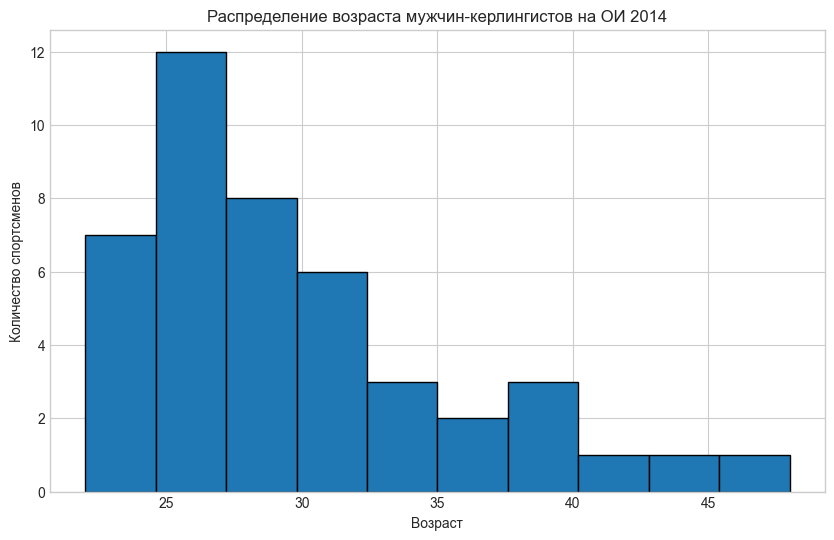

In [19]:
df_curling_2014 = df_athletes[
    (df_athletes['Sport'] == 'Curling') &
    (df_athletes['Sex'] == 'M') &
    (df_athletes['Year'] == 2014)
]

plt.figure(figsize=(10, 6))
plt.hist(df_curling_2014['Age'].dropna(), bins=10, edgecolor='black')
plt.title('Распределение возраста мужчин-керлингистов на ОИ 2014')
plt.xlabel('Возраст')
plt.ylabel('Количество спортсменов')
plt.show()

In [ ]:
df_2006_winter = df_athletes[(df_athletes['Year'] == 2006) & (df_athletes['Season'] == 'Winter')]
df_2006_medals = df_2006_winter.dropna(subset=['Medal'])

country_stats_2006 = df_2006_medals.groupby('NOC').agg(
    MedalCount=('Medal', 'count'),
    AverageAge=('Age', 'mean')
).sort_values(by='MedalCount', ascending=False)

print("Количество медалей и средний возраст по странам (ОИ 2006, Зима):")
display(country_stats_2006.head(10))

Количество медалей и средний возраст по странам (ОИ 2006, Зима):


,MedalCount,AverageAge
NOC,,
CAN,69,27.449275
SWE,64,27.187500
GER,54,28.777778
USA,52,24.519231
FIN,41,28.195122
RUS,41,28.024390
AUT,30,27.333333
CZE,27,29.814815
ITA,25,29.360000


In [ ]:

pivot_table_2006 = pd.pivot_table(
    df_2006_medals,
    values='ID',
    index='NOC',
    columns='Medal',
    aggfunc='count',
    fill_value=0
)

pivot_table_2006 = pivot_table_2006[['Gold', 'Silver', 'Bronze']]

print("Сводная таблица по медалям (ОИ 2006, Зима):")
display(pivot_table_2006.head(10))

Сводная таблица по медалям (ОИ 2006, Зима):


Medal,Gold,Silver,Bronze
NOC,,,
AUS,1,0,1
AUT,16,7,7
BLR,0,1,0
BUL,0,1,0
CAN,30,28,11
CHN,2,5,6
CRO,1,2,0
CZE,1,2,24
EST,3,0,0


# Часть 3

In [23]:
try:
    df_churn = pd.read_csv('data/telecom_churn.csv')
    print("Данные об оттоке клиентов успешно загружены.")
except FileNotFoundError:
    print("Ошибка: файл 'data/telecom_churn.csv' не найден.")
    df_churn = pd.DataFrame()

print("\nОбщая информация о датафрейме:")
df_churn.info()

print("\nСтатистическое описание:")
display(df_churn.describe())

Данные об оттоке клиентов успешно загружены.

Общая информация о датафрейме:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night call

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [24]:
print("Распределение клиентов по статусу 'Churn':")
print(df_churn['Churn'].value_counts())

print("\nТо же самое в процентах:")
print(df_churn['Churn'].value_counts(normalize=True).apply("{:.2%}".format))

Распределение клиентов по статусу 'Churn':
Churn
False    2850
True      483
Name: count, dtype: int64

То же самое в процентах:
Churn
False    85.51%
True     14.49%
Name: proportion, dtype: object


In [ ]:

total_minutes = df_churn['Total day minutes'] + df_churn['Total eve minutes'] + df_churn['Total night minutes']
total_calls = df_churn['Total day calls'] + df_churn['Total eve calls'] + df_churn['Total night calls']

df_churn['Avg call duration'] = (total_minutes / total_calls).fillna(0)

print("Топ-10 клиентов по средней продолжительности одного звонка:")
display(df_churn.sort_values(by='Avg call duration', ascending=False).head(10))

Топ-10 клиентов по средней продолжительности одного звонка:


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Avg call duration
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,...,21.21,275.4,102,12.39,13.3,9,3.59,1,True,3.693644
2824,OR,81,415,No,No,0,324.7,48,55.20,236.4,...,20.09,187.6,78,8.44,13.1,5,3.54,0,True,3.599519
244,VA,108,408,No,No,0,198.5,99,33.75,267.8,...,22.76,354.9,75,15.97,9.4,3,2.54,0,True,3.509402
2321,AR,153,408,No,No,0,154.6,56,26.28,263.0,...,22.36,367.7,89,16.55,15.5,2,4.19,1,False,3.429258
2033,NJ,162,408,No,No,0,217.6,87,36.99,279.0,...,23.72,250.7,65,11.28,10.4,4,2.81,2,True,3.351121
1709,NV,96,408,No,No,0,197.7,68,33.61,250.5,...,21.29,181.2,67,8.15,10.5,3,2.84,3,False,3.347872
2536,CT,119,408,No,No,0,294.2,100,50.01,232.5,...,19.76,195.0,64,8.78,9.0,1,2.43,0,True,3.325806
1686,CT,163,408,No,Yes,40,231.9,56,39.42,211.8,...,18.00,268.5,74,12.08,12.3,3,3.32,2,False,3.222624
649,MO,79,408,No,No,0,261.7,97,44.49,210.6,...,17.90,256.7,83,11.55,6.0,3,1.62,3,True,3.197368
2289,MS,98,415,Yes,Yes,23,245.5,54,41.74,292.7,...,24.88,184.0,90,8.28,10.8,7,2.92,1,False,3.181498


In [26]:
avg_duration_by_churn = df_churn.groupby('Churn')['Avg call duration'].mean()
print("Средняя продолжительность звонка для активных и ушедших клиентов:")
print(avg_duration_by_churn)

Средняя продолжительность звонка для активных и ушедших клиентов:
Churn
False    1.938102
True     2.091193
Name: Avg call duration, dtype: float64


In [27]:
avg_calls_by_churn = df_churn.groupby('Churn')['Customer service calls'].mean()
print("Среднее количество звонков в службу поддержки:")
print(avg_calls_by_churn)

Среднее количество звонков в службу поддержки:
Churn
False    1.449825
True     2.229814
Name: Customer service calls, dtype: float64


In [ ]:

crosstab_service_calls = pd.crosstab(df_churn['Customer service calls'], df_churn['Churn'], normalize='index')
crosstab_service_calls['Churn_True_Percent'] = crosstab_service_calls[True].apply("{:.2%}".format)

print("Таблица сопряженности (процент оттока в зависимости от числа звонков в поддержку):")
display(crosstab_service_calls)

Таблица сопряженности (процент оттока в зависимости от числа звонков в поддержку):


Churn,False,True,Churn_True_Percent
Customer service calls,,,
0,0.868006,0.131994,13.20%
1,0.896698,0.103302,10.33%
2,0.885375,0.114625,11.46%
3,0.897436,0.102564,10.26%
4,0.542169,0.457831,45.78%
5,0.393939,0.606061,60.61%
6,0.363636,0.636364,63.64%
7,0.444444,0.555556,55.56%
8,0.500000,0.500000,50.00%


In [29]:
crosstab_intl_plan = pd.crosstab(df_churn['International plan'], df_churn['Churn'], normalize='index')
crosstab_intl_plan['Churn_True_Percent'] = crosstab_intl_plan[True].apply("{:.2%}".format)
print("Процент оттока в зависимости от наличия международного роуминга:")
display(crosstab_intl_plan)

Процент оттока в зависимости от наличия международного роуминга:


Churn,False,True,Churn_True_Percent
International plan,,,
No,0.885050,0.114950,11.50%
Yes,0.575851,0.424149,42.41%


In [ ]:

df_churn['Predicted churn'] = (df_churn['International plan'] == 'Yes') | (df_churn['Customer service calls'] >= 4)


actual = df_churn['Churn']
predicted = df_churn['Predicted churn']


fp = ((predicted == True) & (actual == False)).sum()
fp_rate = fp / (actual == False).sum()


fn = ((predicted == False) & (actual == True)).sum()
fn_rate = fn / (actual == True).sum()

print("--- Оценка простого прогноза ---")
print(f"Всего ложноположительных срабатываний (ошибка I рода): {fp}")
print(f"Процент ошибок I рода (от всех лояльных клиентов): {fp_rate:.2%}")
print(f"\nВсего ложноотрицательных срабатываний (ошибка II рода): {fn}")
print(f"Процент ошибок II рода (от всех ушедших клиентов): {fn_rate:.2%}")

--- Оценка простого прогноза ---
Всего ложноположительных срабатываний (ошибка I рода): 306
Процент ошибок I рода (от всех лояльных клиентов): 10.74%

Всего ложноотрицательных срабатываний (ошибка II рода): 227
Процент ошибок II рода (от всех ушедших клиентов): 47.00%
